<a href="https://colab.research.google.com/github/Sanjiwani1wadhave/Assignment7/blob/main/assignment_7_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving crime_data.csv to crime_data.csv


In [ ]:
crime=pd.read_csv("crime_data.csv")
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [ ]:
#Normalized data fuction
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [ ]:
df_norm=norm_func(crime.iloc[:,1:])

In [ ]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


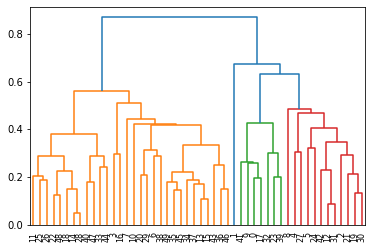

In [ ]:
#create dendrogram
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='average'))

In [ ]:
# create cluster
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')

In [ ]:
hc.fit(df_norm)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [ ]:
# save clusters for chart
y_hc=hc.fit_predict(df_norm)
y_hc

array([3, 4, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       0, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 0, 0])

In [ ]:
crime['h_clusterid']=y_hc

In [ ]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [ ]:
crime1=crime.sort_values("h_clusterid")

In [ ]:
crime1.iloc[:,[0,-1]]

,Unnamed: 0,h_clusterid
49,Wyoming,0
20,Massachusetts,0
29,New Jersey,0
16,Kentucky,0
15,Kansas,0
34,Ohio,0
13,Indiana,0
35,Oklahoma,0
22,Minnesota,0
10,Hawaii,0


**K- means**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# standardisation function
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_crime_df=scaler.fit_transform(crime.iloc[:,1:])
scaled_crime_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116,  1.61867696],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392,  2.4889334 ],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626, -0.1218359 ],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398, -0.99209233],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393, -0.1218359 ],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137, -0.1218359 ],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -0.99209233],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422, -0.99209233],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 , -0.1218359 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293,  1.61867696],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987, -0.99209233],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217,  0.74842053],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525, -0.1218359 ],
       [-0.13637203, -0.70012057, -0.0

In [ ]:
# how to find optimum number of cluster
# the K-Means algorithm aimds to choose centroid that minimise the inertia, or within-cluster sum of square criterion:

In [ ]:
kmeans=KMeans(n_clusters=4,random_state=0)
predict=kmeans.fit_predict(scaled_crime_df)
predict

array([2, 2, 1, 3, 1, 1, 3, 3, 1, 2, 3, 0, 1, 3, 0, 3, 3, 2, 0, 1, 3, 1,
       3, 2, 1, 0, 0, 1, 0, 3, 1, 1, 2, 0, 3, 3, 3, 3, 3, 2, 0, 2, 1, 3,
       0, 3, 3, 0, 3, 3], dtype=int32)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(scaled_crime_df)

KMeans(n_clusters=2, random_state=0)

In [ ]:
kmeans.cluster_centers_

array([[-0.67675778, -0.68274685, -0.13306084, -0.57037591, -0.41192138],
       [ 1.01513667,  1.02412028,  0.19959126,  0.85556386,  0.61788207]])

In [ ]:
kmeans.inertia_


142.2356915237204

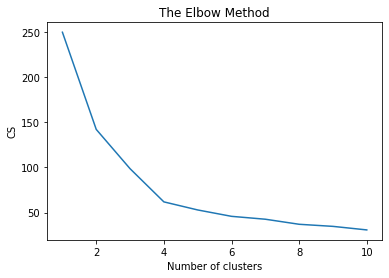

In [ ]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(scaled_crime_df)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()


In [ ]:
#selecting 4 clusters from above screen plot
model=KMeans(n_clusters=4)
model.fit(df_norm)
model.labels_

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int32)

In [ ]:
scaled_crime_df=pd.Series(model.labels_)
crime1['Clust']=scaled_crime_df

In [ ]:
crime1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid,Clust
49,Wyoming,6.8,161,60,15.6,0,0
20,Massachusetts,4.4,149,85,16.3,0,0
29,New Jersey,7.4,159,89,18.8,0,0
16,Kentucky,9.7,109,52,16.3,0,2
15,Kansas,6.0,115,66,18.0,0,0
34,Ohio,7.3,120,75,21.4,0,0
13,Indiana,7.2,113,65,21.0,0,0
35,Oklahoma,6.6,151,68,20.0,0,0
22,Minnesota,2.7,72,66,14.9,0,2
10,Hawaii,5.3,46,83,20.2,0,0


In [ ]:
crime1.iloc[:,1:5].groupby(crime1.Clust).mean()

,Murder,Assault,UrbanPop,Rape
Clust,,,,
0,5.656250,138.875000,73.875000,18.781250
1,10.815385,257.384615,76.000000,33.192308
2,3.600000,78.538462,52.076923,12.176923
3,13.937500,243.625000,53.750000,21.412500


**DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
crime2=pd.read_csv("crime_data.csv")
crime2

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [ ]:
crime2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
crime2.drop(['Unnamed: 0'],axis=1,inplace=True)
crime2

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [ ]:
# normalize heterogeneous numerical data using standard scalar fit transform to dataset
crime2_norm=StandardScaler().fit_transform(crime2)
crime2_norm

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [ ]:
#DBSCAN Clustering
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(crime2_norm)

DBSCAN(eps=1, min_samples=4)

In [ ]:
# Noisy samples are given the label -1
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
# adding clusters to datasets
crime2['clusters']=dbscan.labels_
crime2

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [ ]:
crime2.groupby('clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.005556,247.166667,70.666667,28.766667
1,0,14.050000,238.000000,57.750000,23.200000
2,1,4.825000,112.035714,63.357143,16.107143


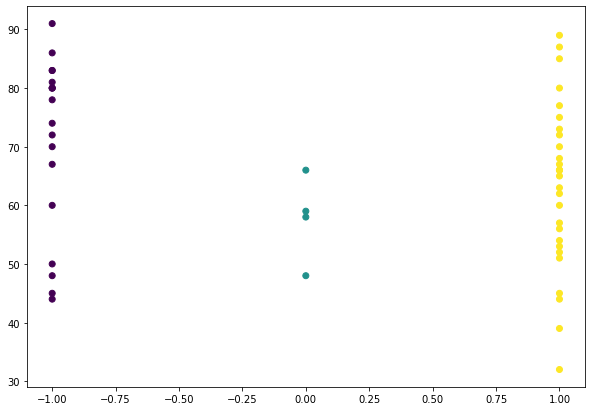

In [ ]:
# Plot Clusters
plt.figure(figsize=(10, 7))
plt.scatter(crime2['clusters'],crime2['UrbanPop'], c=dbscan.labels_)
